In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("dataseta.csv")

In [3]:
pd.set_option('display.max_colwidth', None) # Set pandas to display the full text for each SMS message

In [4]:
df.head()

,text,label
0,I absolutely love having to reset my router every hour. It's such a fun game.,1
1,Thank you for reminding me to update my software for the third time today. I almost forgot.,1
2,I'm so glad my phone has a non-removable battery. It really adds to the convenience.,0
3,Thank you for reminding me how much better your phone is than mine. I was feeling a little too confident about my life.,1
4,I love when my laptop crashes for no reason. It's like a fun surprise.,0


In [5]:
df['num_characters']=df['text'].apply(len)

In [6]:
df.head()

,text,label,num_characters
0,I absolutely love having to reset my router every hour. It's such a fun game.,1,77
1,Thank you for reminding me to update my software for the third time today. I almost forgot.,1,91
2,I'm so glad my phone has a non-removable battery. It really adds to the convenience.,0,84
3,Thank you for reminding me how much better your phone is than mine. I was feeling a little too confident about my life.,1,119
4,I love when my laptop crashes for no reason. It's like a fun surprise.,0,70


In [7]:
import nltk

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [9]:
df['num_words']=df['text'].apply(lambda x:len(word_tokenize(x)))

In [10]:
df.head()

,text,label,num_characters,num_words
0,I absolutely love having to reset my router every hour. It's such a fun game.,1,77,18
1,Thank you for reminding me to update my software for the third time today. I almost forgot.,1,91,19
2,I'm so glad my phone has a non-removable battery. It really adds to the convenience.,0,84,18
3,Thank you for reminding me how much better your phone is than mine. I was feeling a little too confident about my life.,1,119,25
4,I love when my laptop crashes for no reason. It's like a fun surprise.,0,70,17


In [11]:
df['sent_tokenize']=df['text'].apply(lambda x: len(sent_tokenize(x)))

In [12]:
df.head()

,text,label,num_characters,num_words,sent_tokenize
0,I absolutely love having to reset my router every hour. It's such a fun game.,1,77,18,2
1,Thank you for reminding me to update my software for the third time today. I almost forgot.,1,91,19,2
2,I'm so glad my phone has a non-removable battery. It really adds to the convenience.,0,84,18,2
3,Thank you for reminding me how much better your phone is than mine. I was feeling a little too confident about my life.,1,119,25,2
4,I love when my laptop crashes for no reason. It's like a fun surprise.,0,70,17,2


<Axes: xlabel='num_characters', ylabel='Count'>

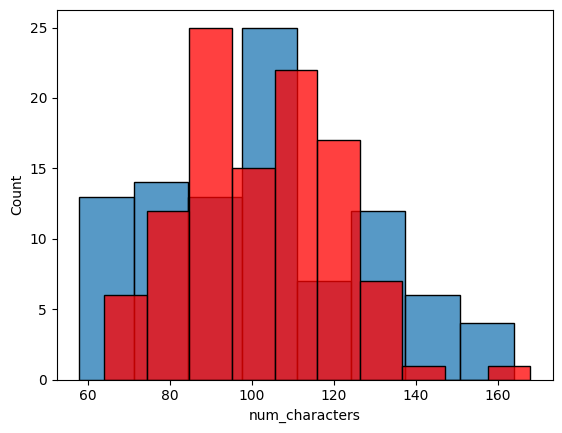

In [13]:
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color='red')

In [14]:
import string
from nltk.corpus import stopwords

In [15]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [16]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [17]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [18]:
df['transformed_text'] = df['text'].apply(transform_text)

In [19]:
df.head()

,text,label,num_characters,num_words,sent_tokenize,transformed_text
0,I absolutely love having to reset my router every hour. It's such a fun game.,1,77,18,2,absolut love reset router everi hour fun game
1,Thank you for reminding me to update my software for the third time today. I almost forgot.,1,91,19,2,thank remind updat softwar third time today almost forgot
2,I'm so glad my phone has a non-removable battery. It really adds to the convenience.,0,84,18,2,glad phone batteri realli add conveni
3,Thank you for reminding me how much better your phone is than mine. I was feeling a little too confident about my life.,1,119,25,2,thank remind much better phone mine feel littl confid life
4,I love when my laptop crashes for no reason. It's like a fun surprise.,0,70,17,2,love laptop crash reason like fun surpris


In [20]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

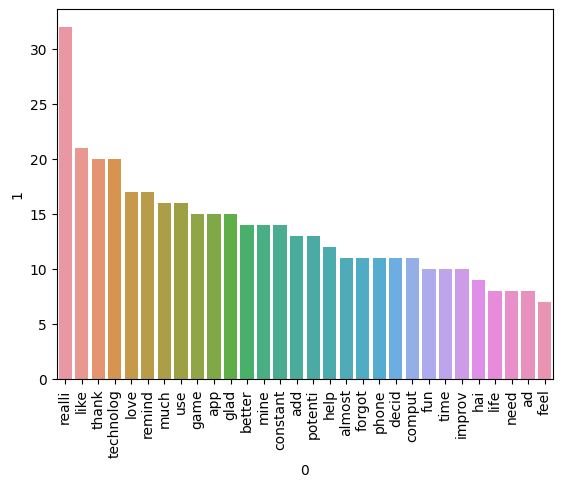

In [21]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [22]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

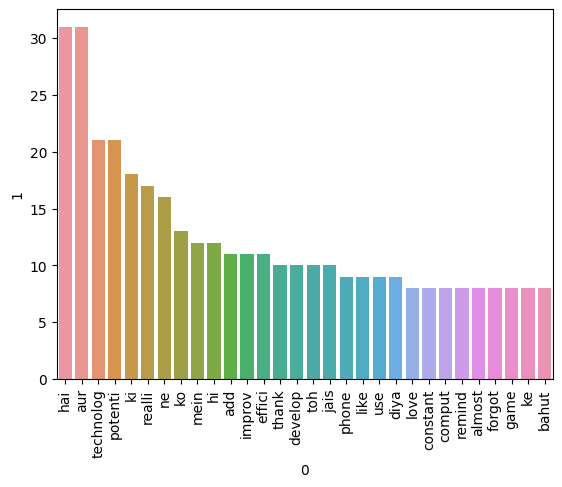

In [23]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=200)

In [25]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [26]:
y = df['label'].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [30]:
mnb = MultinomialNB()

In [31]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.675
[[10  9]
 [ 4 17]]
0.6538461538461539


In [32]:
from sklearn.ensemble import VotingClassifier

In [33]:
voting = VotingClassifier(estimators=[('nb', mnb)],voting='soft')

In [34]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB())], voting='soft')

In [35]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.675
Precision 0.6538461538461539


In [36]:
import pickle
pickle.dump(tfidf,open('anam.pkl','wb'))
pickle.dump(mnb,open('anamta.pkl','wb'))